In [2]:
##libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
df = pd.read_csv('winequality.csv')

In [4]:
#About the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
#Switching Column Names into a suitable format
print(*df.columns, sep='\n')

type
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [6]:
df.columns = ('type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality')

In [7]:
#first 5 rows
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
#checking null values
#using heatmap
import seaborn as sns

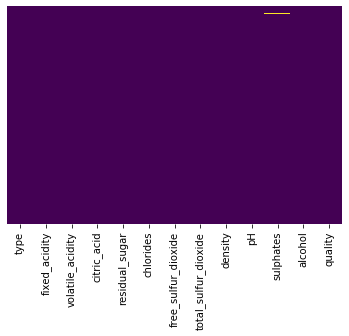

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed_acidity,10,0.001539
volatile_acidity,8,0.001231
citric_acid,3,0.000462
residual_sugar,2,0.000308
chlorides,2,0.000308
free_sulfur_dioxide,0,0.000000
total_sulfur_dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [11]:
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

In [12]:
#filling row with data
fill_list = (null_cell(df)).index

In [13]:
df_mean = df.copy()

for col in fill_list:
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

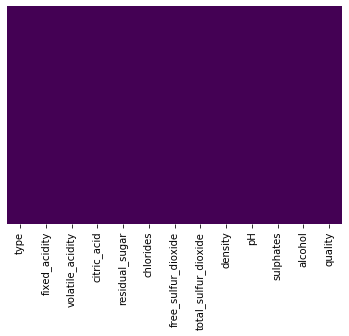

In [14]:
sns.heatmap(df_mean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
corr_matrix = df_mean.corr()
corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]

In [16]:
corr_list

Index(['quality', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH'],
      dtype='object')

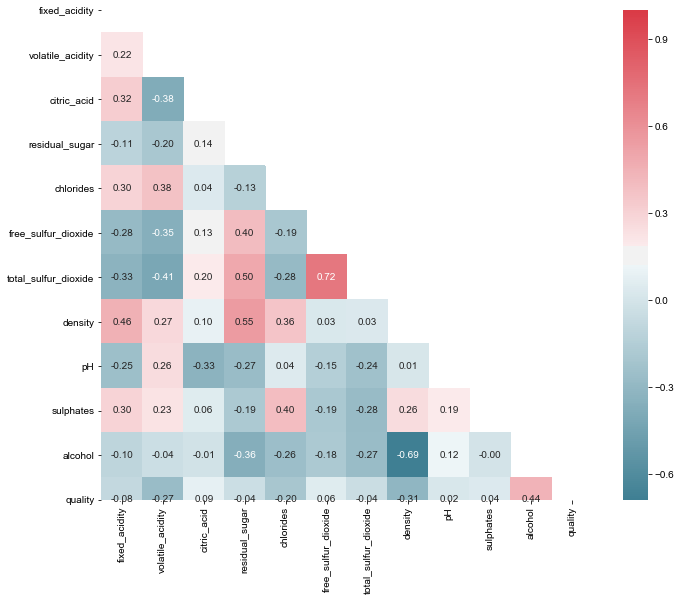

In [17]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

In [ ]:
##Wine quality has the highest correlation with alcohol. Other relation degrees are very low with each other,such as citric acid,free_sulfur_dioxide, sulphates and pH. Quality also has a low negative correlation with density,volatile acidity, chlorides, total_sulfur_dioxide and residual_sugar.

In [18]:
#Distribution of Variables
from scipy.stats import norm 

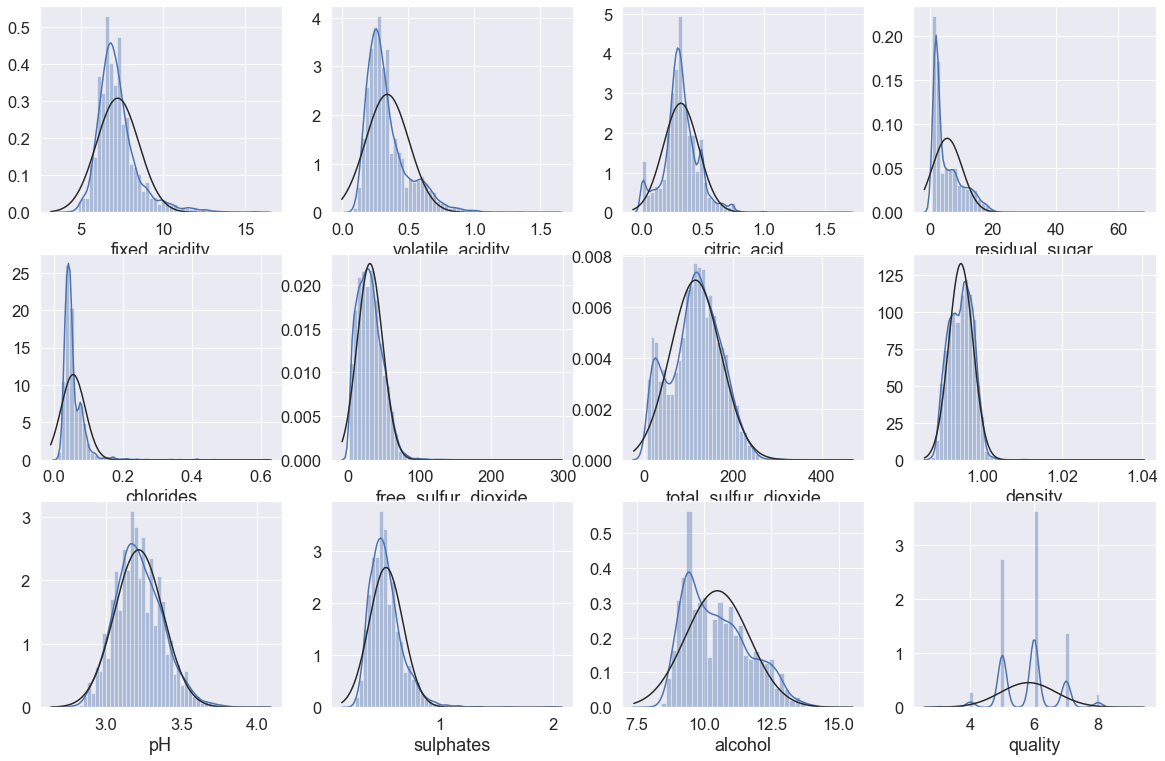

In [19]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)

In [ ]:
#Exploring Wine Quality Classes
#A. Creating 2 Bins Model of Two Types of Wine Quality Classes


In [20]:
df_bins= df_mean.copy()

In [21]:
bins = [0,5,10]


labels = [0, 1] # 'low'=0, 'high'=1
df_bins['quality_range']= pd.cut(x=df_bins['quality'], bins=bins, labels=labels)

print(df_bins[['quality_range','quality']].head(5))

df_bins = df_bins.drop('quality', axis=1) 

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


In [ ]:
#Quality in Different Wine Types

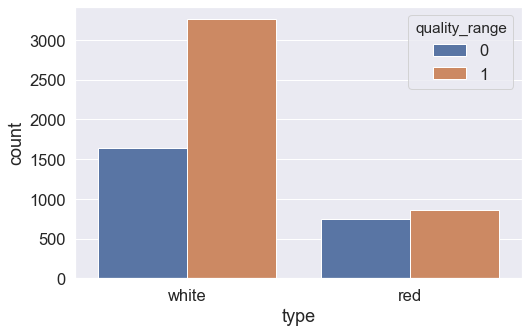

In [22]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'type', hue = 'quality_range', data = df_bins)
plt.show()
# 'low'=0, 'high'=1

In [ ]:
As we see on the chart, Low quality red wine has the highest numerical value in data set as well as low quality white wine. High quality white and red wines have little place in data.

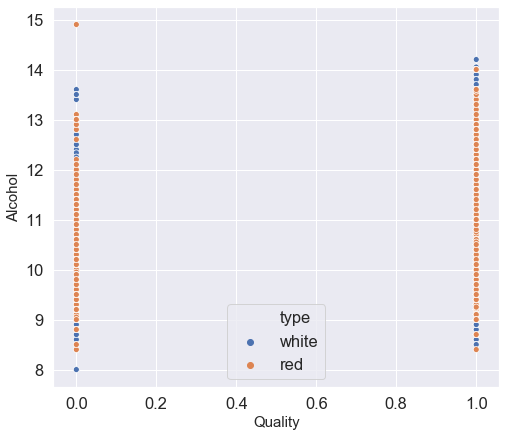

In [23]:
#Quality & Alcohol Relation
plt.figure(figsize=(8,7))
sns.scatterplot(x='quality_range', 
                y='alcohol', 
                hue='type',
                data=df_bins);
plt.xlabel('Quality',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()

In [ ]:
#Red and White wines has similar results on the chart. High quality wines are mostly red wines and have more alcohol level.

In [ ]:
#Quality & Volatile Acidity by Types

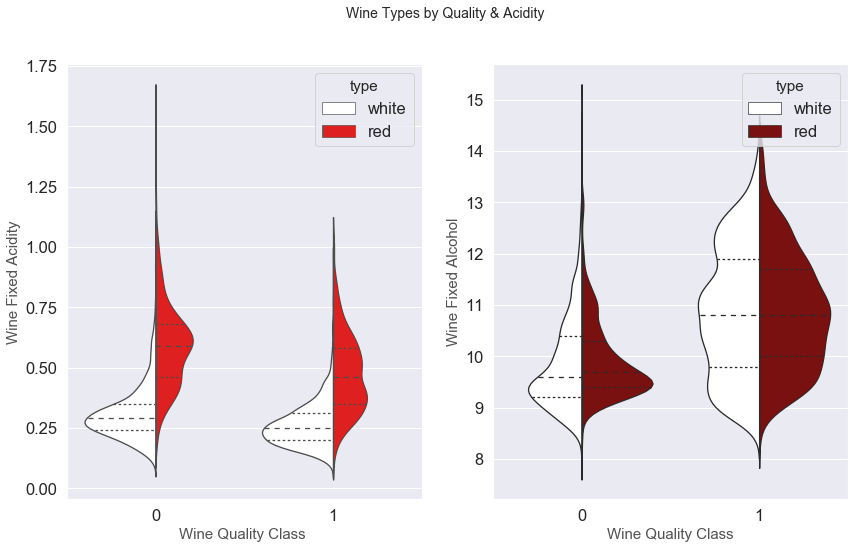

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
f.suptitle('Wine Types by Quality & Acidity', fontsize=14)

sns.violinplot(x='quality_range', y='volatile_acidity', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'red', 'white': 'white'}, ax=ax1)
ax1.set_xlabel("Wine Quality Class ",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 15,alpha=0.8)

sns.violinplot(x='quality_range', y='alcohol', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'darkred', 'white': 'white'}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Fixed Alcohol",size = 15,alpha=0.8)
plt.show()

In [ ]:
#Fixed acidity level is low in both wine classes, especially in white wine while red wine has more in low quality class up to 1.70. Fixed alcohol level is again high in red wine class comparing white wine in low quality. High quality class has the highest fixed alcohol level in booth wine classes.

In [ ]:
#Chlorides Level in Quality Classes

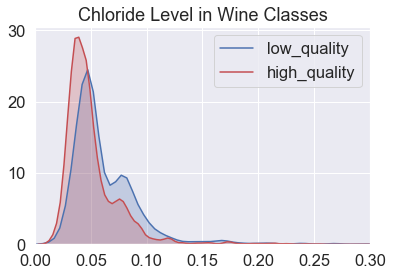

In [25]:
plt.figure(figsize= (6,4))

low_quality = df_bins [df_bins['quality_range']== 0]['chlorides']
high_quality   = df_bins [df_bins['quality_range']== 1][ 'chlorides']
ax = sns.kdeplot(data= low_quality, label= 'low_quality', shade=True, color=None)
ax = sns.kdeplot(data= high_quality,label= 'high_quality',shade=True, color= "r")

plt.title("Chloride Level in Wine Classes")
plt.xlim(0.0,0.3)
plt.legend()
plt.show()

In [ ]:
#Chloride Level is a bit higher in red wine in contrats with white wine.

In [ ]:
#Fixed Acidity & Volatile Acidity & Citric Acid Density in Quality Classes

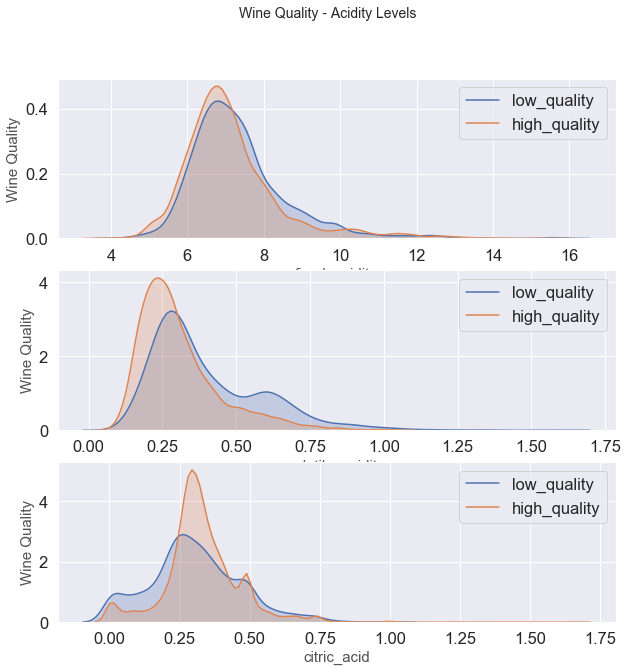

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10,10))

f.suptitle('Wine Quality - Acidity Levels', fontsize=14)


fixed_acidity_low_quality    = df_bins [df_bins['quality_range']== 0]['fixed_acidity']
fixed_acidity_high_quality   = df_bins [df_bins['quality_range']== 1]['fixed_acidity']


volatile_acidity_low_quality = df_bins [df_bins['quality_range']== 0]['volatile_acidity']
volatile_acidity_high_quality= df_bins [df_bins['quality_range']== 1]['volatile_acidity']

citric_acid_low_quality      = df_bins [df_bins['quality_range']== 0]['citric_acid']
citric_acid_high_quality     = df_bins [df_bins['quality_range']== 1]['citric_acid']


sns.kdeplot(data=fixed_acidity_low_quality, label="low_quality", shade=True,ax=ax1)
sns.kdeplot(data=fixed_acidity_high_quality, label="high_quality", shade=True, ax=ax1)
ax1.set_xlabel("fixed_acidity",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=volatile_acidity_low_quality, label="low_quality", shade=True,ax=ax2)
sns.kdeplot(data=volatile_acidity_high_quality, label="high_quality", shade=True, ax=ax2)
ax2.set_xlabel("volatile_acidity",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Quality",size = 15,alpha=0.8)


sns.kdeplot(data=citric_acid_low_quality, label="low_quality", shade=True,ax=ax3)
sns.kdeplot(data=citric_acid_high_quality, label="high_quality", shade=True, ax=ax3)
ax3.set_xlabel("citric_acid",size = 15,alpha=0.8)
ax3.set_ylabel("Wine Quality",size = 15,alpha=0.8)


plt.legend()
plt.show()

In [ ]:
#Residual Sugar Levels by Wine Quality Classes

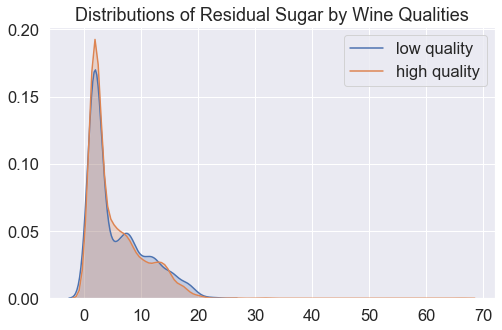

In [27]:
plt.figure(figsize=(8,5))

residual_sugar_low   = df_bins [df_bins['quality_range']== 0]['residual_sugar']
residual_sugar_high  = df_bins [df_bins['quality_range']== 1]['residual_sugar'] 
ax = sns.kdeplot(data= residual_sugar_low, label= 'low quality', shade=True)
ax = sns.kdeplot(data= residual_sugar_high,   label= 'high quality',   shade=True)

plt.title("Distributions of Residual Sugar by Wine Qualities")
plt.legend()
plt.show()


In [ ]:
#Sulfur Dioxide Distribution in Wine Quality Classes

Text(0, 0.5, 'free_sulfur_dioxide')

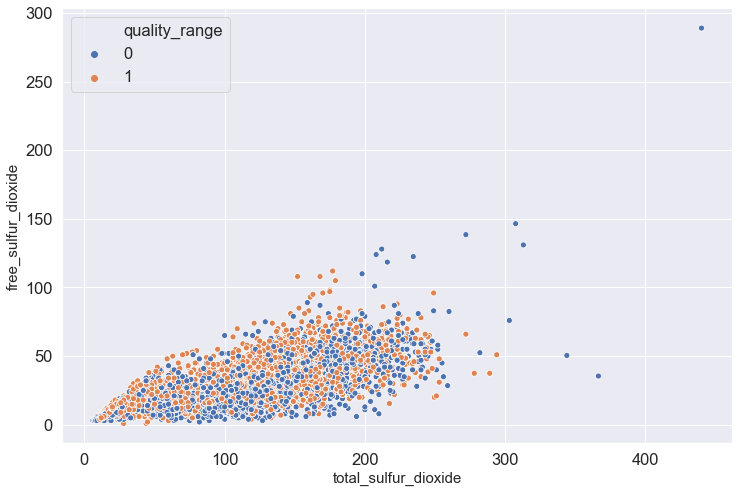

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_sulfur_dioxide', y='free_sulfur_dioxide', hue='quality_range',data=df_bins);
plt.xlabel('total_sulfur_dioxide',size=15)
plt.ylabel('free_sulfur_dioxide', size =15)

In [ ]:
#There are some extreme values in low quality wine class. Total sulfur dioxide level is getting higher in some low quality wine class while general disturubution is standing up to 100 level of free sulfur dioxide.

In [ ]:
#pH Level in Wine Quality

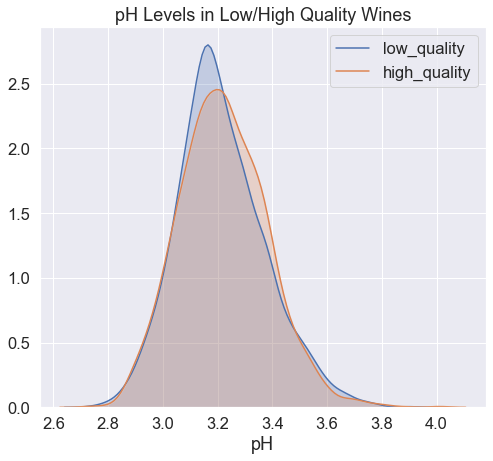

In [29]:
plt.figure(figsize=(8,7))

pH_low_quality  = df_bins [df_bins['quality_range']== 0]['pH']
pH_high_quality = df_bins [df_bins['quality_range']== 1][ 'pH']
ax = sns.kdeplot(data= pH_low_quality, label= 'low_quality', shade=True) 
ax = sns.kdeplot(data= pH_high_quality,label= 'high_quality',   shade=True)

plt.title("pH Levels in Low/High Quality Wines")
plt.xlabel('pH')
plt.legend()
plt.show()

In [ ]:
#Density by Wine Quality Classes

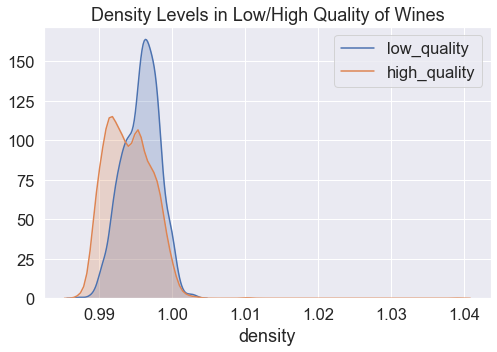

In [30]:
plt.figure(figsize=(8,5))

density_low_quality  = df_bins [df_bins['quality_range']== 0]['density']
density_high_quality = df_bins [df_bins['quality_range']== 1][ 'density']
ax = sns.kdeplot(data= density_low_quality, label= 'low_quality', shade=True) 
ax = sns.kdeplot(data= density_high_quality,label= 'high_quality', shade=True)

plt.title("Density Levels in Low/High Quality of Wines")
plt.xlabel('density')
plt.legend()
plt.show()

In [ ]:
#Sulphate Values in Wine Quality Classes

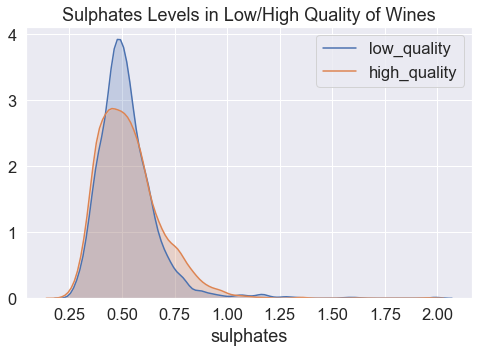

In [31]:
plt.figure(figsize=(8,5))

sulphates_low_quality    = df_mean [df_bins['quality_range']== 0]['sulphates']
sulphates_high_quality   = df_mean [df_bins['quality_range']== 1][ 'sulphates']
ax = sns.kdeplot(data= sulphates_low_quality, label= 'low_quality',  shade=True) 
ax = sns.kdeplot(data= sulphates_high_quality,label= 'high_quality', shade=True)

plt.title("Sulphates Levels in Low/High Quality of Wines")
plt.xlabel('sulphates')
plt.legend()
plt.show()

In [ ]:
#There is more low quality wine in between 0.4 and 0.6 levels of sulphate levels. Both quality classes have similar values.

In [ ]:
#Overview about Outliers

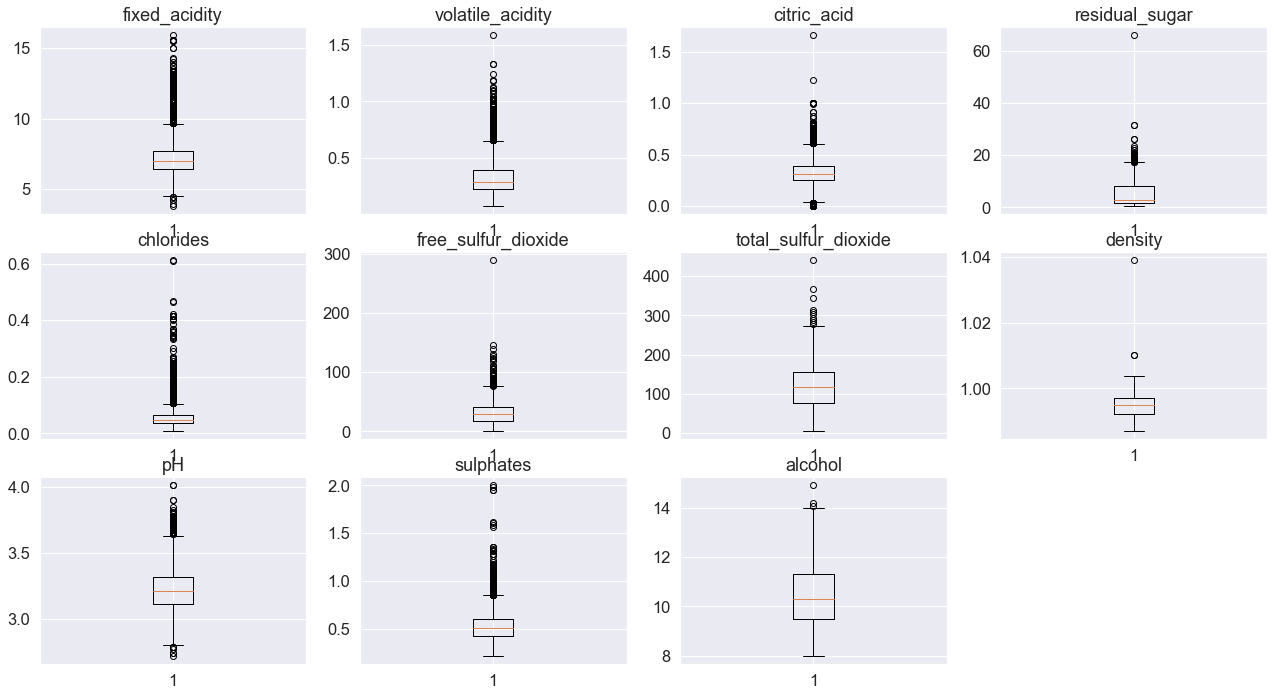

In [32]:
outliers_by_12_variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
                            'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                            'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
plt.figure(figsize=(22,20))

for i in range(0,11):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df_bins[outliers_by_12_variables[i]])
    plt.title(outliers_by_12_variables[i])

In [33]:
#A.Winsorization
def winsor(x, multiplier=3): 
    upper= x.median() + x.std()*multiplier
    for limit in np.arange(0.001, 0.20, 0.001):
        if np.max(winsorize(x,(0,limit))) < upper:
            return limit
    return None 

In [34]:
from scipy.stats.mstats import winsorize

kolon_isimleri = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                                  'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for i in range(1,len(kolon_isimleri)):

    df_bins[kolon_isimleri[i]] = winsorize(df_bins[kolon_isimleri[i]], (0, winsor(df_bins[kolon_isimleri[i]])))

In [ ]:
##LOGISTIC REGRESSION##

In [ ]:
#A.Creating Train / Test Groups with 2 Bins Model
#In order to have all variables in numeric data, I mapped wine types as following by using the previous data frame 'df_bins':

In [35]:
df_bins.type = df_bins.type.map({'white':0, 'red':1})

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [37]:
X = df_bins[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']] 
y = df_bins.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [38]:
#Logistic Regression---
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.74
Accuracy in Test  Group   : 0.74


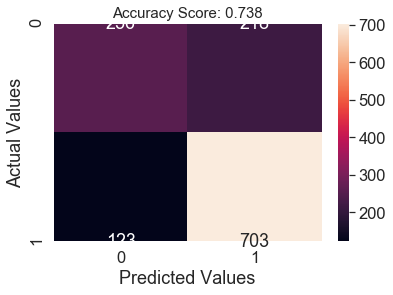

In [42]:
#Confusion Matrix in Chart
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()


In [43]:
pred_test  = lr.predict(X_test)
pred_train = lr.predict(X_train)

In [44]:
#Confusion Matrix in array format
from sklearn.metrics import confusion_matrix 


cm = confusion_matrix(y_test,pred_test)
cm

array([[256, 218],
       [123, 703]], dtype=int64)

In [45]:
#Performance Measurements
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)
confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')
print('Confusion Matrix Test Data', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[1059  851]
 [ 482 2805]]
Confusion Matrix Test Data
----------------------------------------
[[256 218]
 [123 703]]


In [47]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 256
(Total) True Positive       : 703
(Total) Negative Positive   : 218
(Total) Negative Negative   : 123


In [48]:
FP+FN 

341

In [49]:
#Accuracy
from sklearn.metrics import accuracy_score

print("Accuracy Score of Our Model     : ",  quality_pred.score(X_test, y_test))
#print("Accuracy Score of Our Model     : ",  accuracy_score(y_test, pred_test)) # same 

Accuracy Score of Our Model     :  0.7376923076923076


In [50]:
#Error Rate
Error_Rate = 1- (accuracy_score(y_test, pred_test))  
Error_Rate

0.26230769230769235

In [ ]:
#Precision: Out of all the predicted positive instances, how many were predicted correctly = TP / (TP + FP) )

In [51]:
from sklearn.metrics import precision_score

print("precision_score()         : ",  precision_score(y_test, pred_test, average='micro'))

precision_score()         :  0.7376923076923076


In [52]:
#Recall ( Out of all the positive classes, how many instances were identified correctly = TP / (TP + FN))
from sklearn.metrics import recall_score

print("recall_score()            : ",  recall_score(y_test, pred_test, average='micro'))

recall_score()            :  0.7376923076923076


In [53]:
#Specificity :(TN)/(TN + FP))
print(" Specificity Score   : ",  (TN)/(TN + FP)) 

 Specificity Score   :  0.540084388185654


In [ ]:
##F1-Score: From Precision and Recall, F-Measure is computed and used as metrics sometimes. F – Measure is nothing but the harmonic mean of Precision and Recall =(2 Recall Precision) / (Recall + Precision) )

In [54]:
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, pred_test,average='micro')
recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))
#print("F1_score     : ",  f1_score(y_test, pred_test,average='micro')) #By formula

F1_score     :  0.7376923076923076


In [55]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test))

print("f1_score        : {:.2f}".format(f1_score(y_test, pred_test, average='micro')))
print("recall_score    : {:.2f}".format(recall_score(y_test, pred_test, average='micro')))
print("precision_score : {:.2f}".format(precision_score(y_test, pred_test, average='micro')))

print('\n')
metrics =  precision_recall_fscore_support(y_test, pred_test)
print("Precision       :" , metrics[0]) 
#print("Recall          :" , metrics[1]) 
print("F1 Score        :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       474
           1       0.76      0.85      0.80       826

    accuracy                           0.74      1300
   macro avg       0.72      0.70      0.70      1300
weighted avg       0.73      0.74      0.73      1300

f1_score        : 0.74
recall_score    : 0.74
precision_score : 0.74


Precision       : [0.67546174 0.76330076]
F1 Score        : [0.60023447 0.80480824]


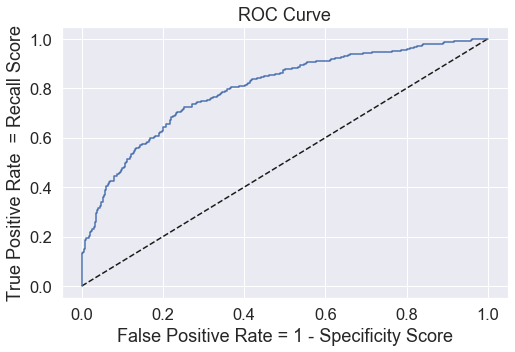

In [56]:
#ROC/AUC(Area Under Curve)
probs = quality_pred.predict_proba(X_test)[:,1]  #Predict probabilities for the test data

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs) #Get the ROC Curve


import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = 1 - Specificity Score')
plt.ylabel('True Positive Rate  = Recall Score')
plt.title('ROC Curve')
plt.show()

In [57]:
print('AUC Değeri : ', roc_auc_score(y_test.values, probs))

AUC Değeri :  0.7970137207425343


In [ ]:
#PRECISION RECALL CURVE
##(The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
##The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.)

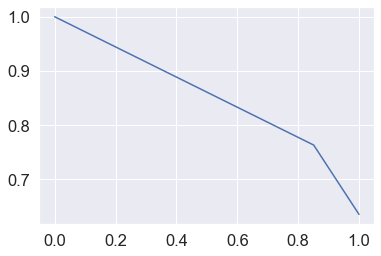

In [58]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, pred_test)

plt.plot(recall, precision)
plt.show()

In [ ]:
#Log Loss (calculating the difference between ground truth and predicted score for every observation and average those errors over all observations. )

In [59]:
from sklearn.metrics import log_loss

print("Log-Loss)    : " , log_loss(y_test.values, probs))
print("Error Rate   : " , 1- accuracy_score(y_test.values, pred_test))

Log-Loss)    :  0.5215456586648515
Error Rate   :  0.26230769230769235


In [60]:
#General Looking at Results

C_values = [0.001,0.01,0.1,1,10,100, 1000]
accuracy_df = pd.DataFrame(columns = ['C_values','Accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'Accuracy Train', 'Accuracy Test'])

for c in C_values:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    accuracy_values = accuracy_values.append({'C Value': c,
                                                    'Accuracy Train' : lr.score(X_train, y_train),
                                                    'Accuracy Test': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)

,C Value,Accuracy Train,Accuracy Test
0,0.001,0.658072,0.636154
1,0.010,0.692707,0.670000
2,0.100,0.728112,0.726154
3,1.000,0.743506,0.737692
4,10.000,0.746585,0.742308
5,100.000,0.746585,0.743846
6,1000.000,0.746969,0.744615


In [61]:
#Creating 3 Bins Models by a large Margin
df_mean.head(1)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [62]:
df_bins3= df_mean.copy()

In [63]:
df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

In [64]:
bins = [0,4,7,10]

labels = [0,1,2] # 'low'=0,'average'=1, 'high'=2

df_bins3['quality_range']= pd.cut(x=df_bins3['quality'], bins=bins, labels=labels)

#df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

print(df_bins3[['quality_range','quality']].head(5))

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


In [65]:
X = df_bins3[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']]
y = df_bins3.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [66]:
X_test.head()

,type,alcohol,density,volatile_acidity,chlorides,citric_acid,fixed_acidity,free_sulfur_dioxide,total_sulfur_dioxide,sulphates,residual_sugar,pH
369,0,11.6,0.99410,0.39,0.044,0.35,7.1,26.0,72.0,0.29,12.5,3.17
6243,1,10.2,0.99613,0.44,0.063,0.24,8.2,10.0,28.0,0.53,2.3,3.25
3374,0,9.5,0.99341,0.19,0.045,0.21,5.9,57.0,135.0,0.44,1.7,3.32
1009,0,10.5,0.99300,0.15,0.055,0.39,8.3,32.0,146.0,0.39,1.3,3.08
220,0,11.0,0.99390,0.27,0.036,0.36,7.5,45.0,164.0,0.33,7.0,3.03


In [67]:
#LogisticRegression
lr    = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy Score of Train Model : 0.93
Accuracy Score of Test  Model : 0.93


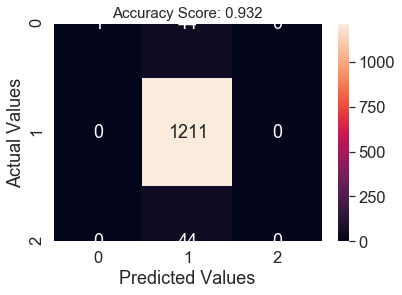

In [69]:
from sklearn.metrics import confusion_matrix as cm

predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [70]:
y_pred = lr.predict(X_test)
y_pred[y_pred == 2]

array([], dtype=int64)

In [71]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[   1,   44,    0],
       [   0, 1211,    0],
       [   0,   44,    0]], dtype=int64)

In [72]:
#Performance Measurement
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
pred_train = lr.predict(X_train)
pred_test  = lr.predict(X_test)

In [76]:
confusion_matrix_train = confusion_matrix(y_train,pred_train)
confusion_matrix_test = confusion_matrix(y_test,pred_test)

print('Confusion Matrix Train Data', '--'*20, confusion_matrix_train, sep='\n')
print('Confusion Matrix Test  Data ', '--'*20, confusion_matrix_test, sep='\n')

Confusion Matrix Train Data
----------------------------------------
[[   2  199    0]
 [   2 4840    0]
 [   0  154    0]]
Confusion Matrix Test  Data 
----------------------------------------
[[   1   44    0]
 [   0 1211    0]
 [   0   44    0]]


In [77]:
#TN = confusion_matrix_test[0][0]
#TP = confusion_matrix_test[1][1]
#FP = confusion_matrix_test[0][1]
#FN = confusion_matrix_test[1][0]

print("(Total) True Negative       :", TN)
print("(Total) True Positive       :", TP)
print("(Total) Negative Positive   :", FP)
print("(Total) Negative Negative   :", FN)

(Total) True Negative       : 256
(Total) True Positive       : 703
(Total) Negative Positive   : 218
(Total) Negative Negative   : 123


In [78]:
#Accuracy
from sklearn.metrics import accuracy_score

print("Accuracy Score of Test Model : ",  quality_pred.score(X_test, y_test))

Accuracy Score of Test Model :  0.9323076923076923


In [79]:
#Error Rate
Error_Rate = 1 - (accuracy_score(y_test, pred_test))
Error_Rate

0.06769230769230772

In [80]:
#Precision
from sklearn.metrics import precision_score

print("precision_score        : ",  precision_score(y_test, pred_test, average='micro'))

precision_score        :  0.9323076923076923


In [81]:
#Recall/Sensitivity
from sklearn.metrics import recall_score

print("recall_score        : ",  recall_score(y_test, pred_test, average='micro'))

recall_score        :  0.9323076923076923


In [82]:
##F1 Score
from sklearn.metrics import f1_score

precision_s = precision_score(y_test, pred_test,average='micro')
recall_s    = recall_score(y_test, pred_test, average='micro')


print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))# by mathematical formula
print("f1_score()   : ",  f1_score(y_test, pred_test,average='micro'))  #By formula

F1_score     :  0.9323076923076923
f1_score()   :  0.9323076923076923


In [83]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test) )

print("f1_score()         : {:.2f}".format(f1_score(y_test, pred_test, average='micro')))
print("recall_score()     : {:.2f}".format(recall_score(y_test, pred_test, average='micro')))
print("precision_score()  : {:.2f}".format(precision_score(y_test, pred_test, average='micro')))

print('\n')
metrikler =  precision_recall_fscore_support(y_test, pred_test)
print("Precision   :" , metrics[0]) 
print("Recall      :" , metrics[1]) 
print("F1 Score    :" , metrics[2]) 

warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        45
           1       0.93      1.00      0.96      1211
           2       0.00      0.00      0.00        44

    accuracy                           0.93      1300
   macro avg       0.64      0.34      0.34      1300
weighted avg       0.90      0.93      0.90      1300

f1_score()         : 0.93
recall_score()     : 0.93
precision_score()  : 0.93


Precision   : [0.67546174 0.76330076]
Recall      : [0.54008439 0.85108959]
F1 Score    : [0.60023447 0.80480824]


In [84]:
from sklearn.preprocessing import LabelBinarizer

In [85]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [86]:
print('AUC Değeri : ', multiclass_roc_auc_score(y_test.values, y_pred))

AUC Değeri :  0.5055763628797337


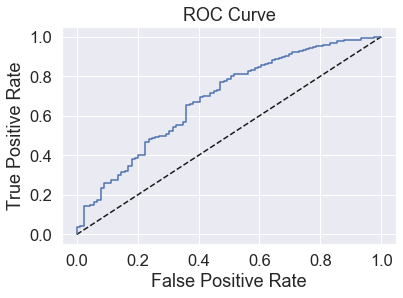

In [87]:
#ROC/AUC(Area under the curve)
probs = quality_pred.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label=1)


# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

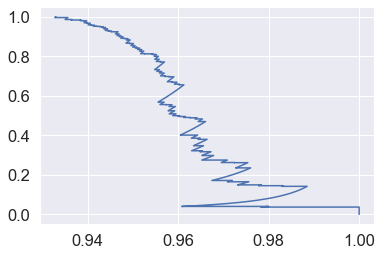

In [88]:
#PRECISION RECALL CURVE
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, probs, pos_label=1)

plt.plot(precision, recall)
plt.show()

In [89]:
#Exploring the insights
C_values = [0.001,0.01,0.1,1,10,100, 1000]
accuracy_df = pd.DataFrame(columns = ['C_values','Accuracy'])

accuracy_values = pd.DataFrame(columns=['C Value', 'Accuracy Train', 'Accuracy Test'])

for c in C_values: 
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    accuracy_values = accuracy_values.append({'C Value': c,
                                                    'Accuracy Train' : lr.score(X_train, y_train),
                                                    'Accuracy Test': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(accuracy_values)

,C Value,Accuracy Train,Accuracy Test
0,0.001,0.931691,0.931538
1,0.010,0.931691,0.931538
2,0.100,0.931691,0.931538
3,1.000,0.931691,0.932308
4,10.000,0.931884,0.933077
5,100.000,0.931884,0.933077
6,1000.000,0.931884,0.933077


In [ ]:
#In order to see the differency between logistic regression model, I also would like to check resampling imblance data. In previous steps, I added bins in low and high ranges on quality variable, this section will show the results by using resampling method.

In [ ]:
#Imbalanced Data
#In order to see the differency between logistic regression model, I also would like to check resampling imblance data. In previous steps, I added bins in low and high ranges on quality variable, this section will show the results by using resampling method.

In [90]:
df_mean_imb = df_mean.copy() 

In [91]:
bins = [0,4,10] 


labels = [0, 1] # 'low'=0, 'high'=1 
df_mean_imb['quality_range']= pd.cut(x=df_mean_imb['quality'], bins=bins, labels=labels) 

print(df_mean_imb[['quality_range','quality']].head(5)) 

df_mean_imb = df_mean_imb.drop('quality', axis=1) #

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


Low Quality  0   : %96.21
High Quality 1   : %3.79


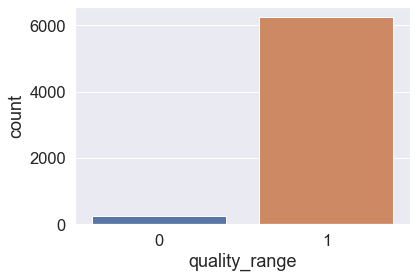

In [92]:
sns.countplot(df_mean_imb.quality_range)
 #'low'=0, 'high'=1
    
print("Low Quality  0   : %{:.2f}".format(sum(df_mean_imb.quality_range)/len(df_mean_imb.quality_range)*100))
print("High Quality 1   : %{:.2f}".format((len(df_mean_imb.quality_range)-sum(df_mean_imb.quality_range))/len(df_mean_imb.quality_range)*100))

In [ ]:
#When splitting data in two parts starting from four, it gives an imbalanced data.

In [ ]:
balance = (df_mean_imb.quality_range.value_counts()[1]/df_mean_imb.quality_range.shape[0])*100
print('Data Quality Percentage:\n', balance,'%')

In [98]:
#Cross Validation with 2 Bins Model
df_bins.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,0,7.0,0.27,0.36,17.2,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [99]:
X = df_bins.drop(['quality_range'], axis=1)
y = df_bins.quality_range
y = np.array(y)

In [100]:
plt.style.use('fivethirtyeight')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print("Number of Rows in    Training dataset :  {} ".format(len(X_train)))
print("Number of Targets in Training dataset :  {} ".format(len(y_train)))
print("Number of Rows in    Test dataset :  {} ".format(len(X_test)))
print("Number of Targets in Test dataset :  {} ".format(len(y_test)))

Number of Rows in    Training dataset :  4547 
Number of Targets in Training dataset :  4547 
Number of Rows in    Test dataset :  1950 
Number of Targets in Test dataset :  1950 


(0, 1000)

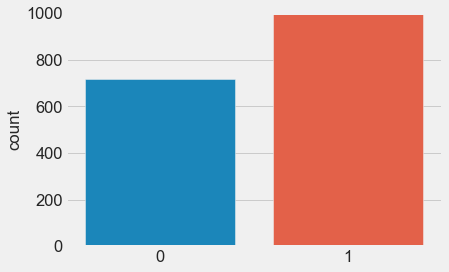

In [101]:
sns.countplot(y_test)
plt.ylim((0,1000))

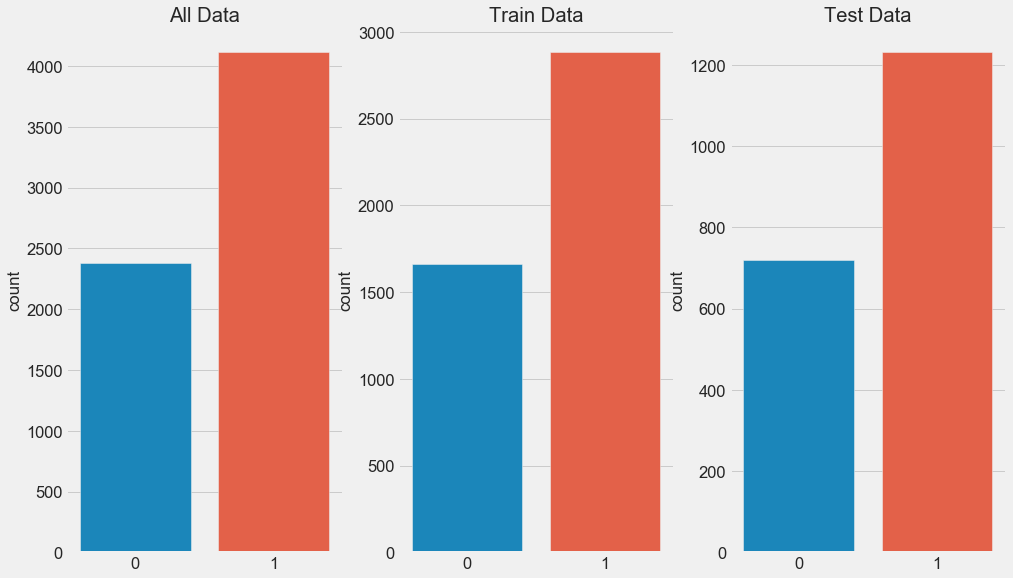

In [102]:
plt.figure(figsize=(15,9))
y_list = [y, y_train, y_test]
titles = ['All Data','Train Data', 'Test Data']

for i in range(1,4):
    plt.subplot(1,3,i)
    sns.countplot(y_list[i-1])
    plt.title(titles[i-1])

In [103]:
print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_train[y_train==0])/len(y_train)*100))

Tüm veri kümesi '0' yüzdesi : %37 
Test verisi '0' yüzdesi     : %37 
Eğitim verisi '0' yüzdesi   : %37 


In [104]:
LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
tahmin_eğitim = model.predict(X_train)
tahmin_test = model.predict(X_test)
model.score(X_test, y_test)

0.742051282051282

In [ ]:
#I splitted y values equally and trained the model.However, in order to see X values distribution we need following Cross Validation Measurement.

In [106]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=40) 

In [107]:
X.loc[[3,5]] 

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1


In [108]:
parcalar = kf.split(X)
for num, (train_index, test_index) in enumerate(parcalar): 
    print("{}.Training Set Size : {}".format(num+1,len(train_index)))  
    print("{}.Test Set Size     : {}".format(num+1,len(test_index))) 
    print('-'*26)

1.Training Set Size : 5197
1.Test Set Size     : 1300
--------------------------
2.Training Set Size : 5197
2.Test Set Size     : 1300
--------------------------
3.Training Set Size : 5198
3.Test Set Size     : 1299
--------------------------
4.Training Set Size : 5198
4.Test Set Size     : 1299
--------------------------
5.Training Set Size : 5198
5.Test Set Size     : 1299
--------------------------


In [109]:
from sklearn.metrics import mean_squared_error 

model2 = LogisticRegression()
pieces = kf.split(X)
accuracy_list = []

for i, (egitim_indeks, test_indeks) in enumerate(pieces):
    
    X_train, y_train = X.loc[train_index], y[train_index]
    X_test, y_test = X.loc[test_indeks], y[test_indeks]
    
    model2.fit(X_train, y_train)
    tahmin = model2.predict(X_test)
    accuracy_value = model2.score(X_test, y_test)  
    
    accuracy_list.append(accuracy_value)
    
    print("{}.Accuracy Value of Pieces: {:.3f}".format(i+1, accuracy_value))
    print("-"*30)

1.Accuracy Value of Pieces: 0.737
------------------------------
2.Accuracy Value of Pieces: 0.745
------------------------------
3.Accuracy Value of Pieces: 0.758
------------------------------
4.Accuracy Value of Pieces: 0.734
------------------------------
5.Accuracy Value of Pieces: 0.731
------------------------------


In [110]:
print("Avarage Accuracy Value : {:.2f}".format(np.mean(accuracy_list)))

Avarage Accuracy Value : 0.74


In [ ]:
##We splited our function in 5 pieces and trained them with Kfold method. In the following section, Cross Validate and Cross Validation Score tools will do everything itself.

In [111]:
from sklearn.model_selection import cross_validate, cross_val_score

In [112]:
lrm = LogisticRegression()
cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores           : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.66513057 0.70814132 0.73886329 0.71230769 0.72727273 0.75346687
 0.73651772 0.81972265 0.64869029 0.77195686]
--------------------------------------------------
Train Scores           : 
[0.75248033 0.74444064 0.74632227 0.74807594 0.74675103 0.73905609
 0.74350205 0.73905609 0.75341997 0.74418605]


In [113]:
print('Mean of Test Set  : ', cv['test_score'].mean())
print('Mean of Train Set : ', cv['train_score'].mean())

Mean of Test Set  :  0.7282069987603065
Mean of Train Set :  0.7457290451850696


In [ ]:
#The average accuracy score is calculated from 10 different accuracy scores from the model.We still have similiar accuracy scores (.96-.97) by different methods applied previously.

In [114]:
cv = cross_validate(estimator=lrm, 
                     X=X,
                     y=y,
                     cv=10,return_train_score=True,
                     scoring = ['accuracy', 'r2', 'precision']
                    )

In [115]:
print('Test Set Accuracy   Mean      : {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Set R Square   Mean      : {:.2f}'.format(cv['test_r2'].mean()))
print('Test Set Precision  Mean      : {:.2f}'.format(cv['test_precision'].mean()))
print('Train Set Accuracy  Mean      : {:.2f}'.format(cv['train_accuracy'].mean()))
print('Train Set R Square  Mean      : {:.2f}'.format(cv['train_r2'].mean()))
print('Train Set Precision Mean      : {:.2f}'.format(cv['train_precision'].mean()))

Test Set Accuracy   Mean      : 0.73
Test Set R Square   Mean      : -0.17
Test Set Precision  Mean      : 0.77
Train Set Accuracy  Mean      : 0.75
Train Set R Square  Mean      : -0.09
Train Set Precision Mean      : 0.77


In [116]:
cv = cross_val_score(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10                    
                    )
print('Model Scores           : ', cv, sep = '\n')

Model Scores           : 
[0.66513057 0.70814132 0.73886329 0.71230769 0.72727273 0.75346687
 0.73651772 0.81972265 0.64869029 0.77195686]


In [ ]:
#cross_val_score and cross_validate functions used only test set. In order to have model predictions we can also check cross_val_predict function.

In [117]:
from sklearn.model_selection import cross_val_predict 

In [118]:
y_pred = cross_val_predict(estimator=lrm, X=X, y=y, cv=10)
print(y_pred[0:10])

[1 0 1 1 1 1 0 1 0 1]


In [119]:
#Hyperparameter Tuning

logreg = LogisticRegression()
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [120]:
#Grid Search 
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [121]:
parameters

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 'penalty': ['l1', 'l2']}

In [122]:
from sklearn.model_selection import GridSearchCV


grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parameters,
                       cv = 10
                      )
grid_cv.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [123]:
print("The Best Parametre : ", grid_cv.best_params_)
print("The Best Score     : ", grid_cv.best_score_)

The Best Parametre :  {'C': 10, 'penalty': 'l2'}
The Best Score     :  0.7320301677697398


In [124]:
results = grid_cv.cv_results_
df = pd.DataFrame(results)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006397,0.001635,0.001332,0.000717,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",0.367127,0.367127,0.367127,0.367692,0.366718,0.366718,0.366718,0.366718,0.366718,0.366718,0.366939,0.000311,20
1,0.008080,0.001018,0.000824,0.000355,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.640553,0.637481,0.634409,0.633846,0.634823,0.634823,0.633282,0.631741,0.633282,0.633282,0.634755,0.002401,18
2,0.005137,0.001282,0.000481,0.000491,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.632873,0.632873,0.632873,0.632308,0.633282,0.633282,0.633282,0.633282,0.633282,0.633282,0.633061,0.000311,19
3,0.009998,0.001120,0.000678,0.000385,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.634409,0.648233,0.655914,0.655385,0.644068,0.619414,0.637904,0.617874,0.633282,0.630200,0.637679,0.012689,16
4,0.012479,0.001611,0.000976,0.000245,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.639017,0.639017,0.640553,0.640000,0.634823,0.633282,0.636364,0.631741,0.633282,0.633282,0.636140,0.003108,17


In [125]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
17,l2,1000,0.732030
13,l2,10,0.732030
15,l2,100,0.731876
19,l2,10000,0.731722
18,l1,10000,0.731722
14,l1,100,0.731722
12,l1,10,0.731568
16,l1,1000,0.731414
10,l1,1,0.730645
11,l2,1,0.728182


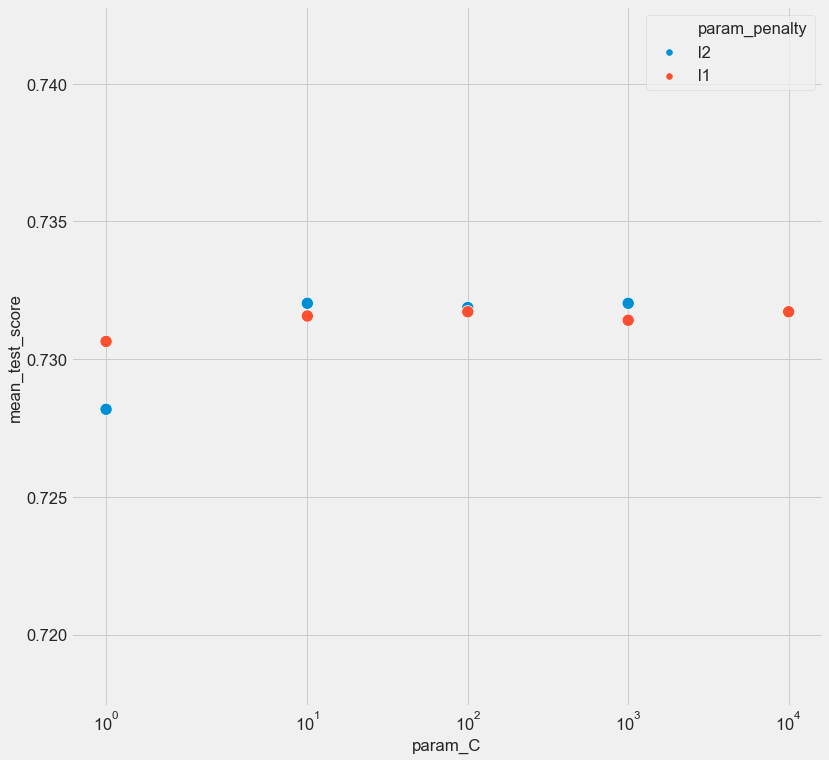

In [126]:
#The most successful 10 parametres on a chart.
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,12))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=150)

plt.xscale('symlog')
#plt.ylim((0.9,1))
plt.show()

In [127]:
#RandomizedSearchCV
#While we checked all combinations of our parameters with Grid Search method, we can also use this function with desired number of conbinations of parameters.
parametres = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [128]:
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametres,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_sta

In [129]:
print("The Best Parametres        : ", rs_cv.best_params_)
print("All Precisions Values      : ", rs_cv.cv_results_['mean_test_score'])
print("The Best Precision Value   : ", rs_cv.best_score_)

The Best Parametres        :  {'penalty': 'l2', 'C': 1000}
All Precisions Values      :  [0.64100899 0.65846295 0.77527506 0.7715504  0.77500886 0.77643996
 0.68109405 0.6360135  0.77519703 0.        ]
The Best Precision Value   :  0.7764399560176504


In [130]:
results_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(results_rs)

In [131]:
results_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs

,param_penalty,param_C,mean_test_score
5,l2,1000,0.776440
2,l2,10,0.775275
8,l1,1000,0.775197
4,l1,100,0.775009
3,l2,1,0.771550
6,l1,0.01,0.681094
1,l2,0.001,0.658463
0,l2,0.0001,0.641009
7,l1,0.001,0.636014
9,l1,1e-05,0.000000


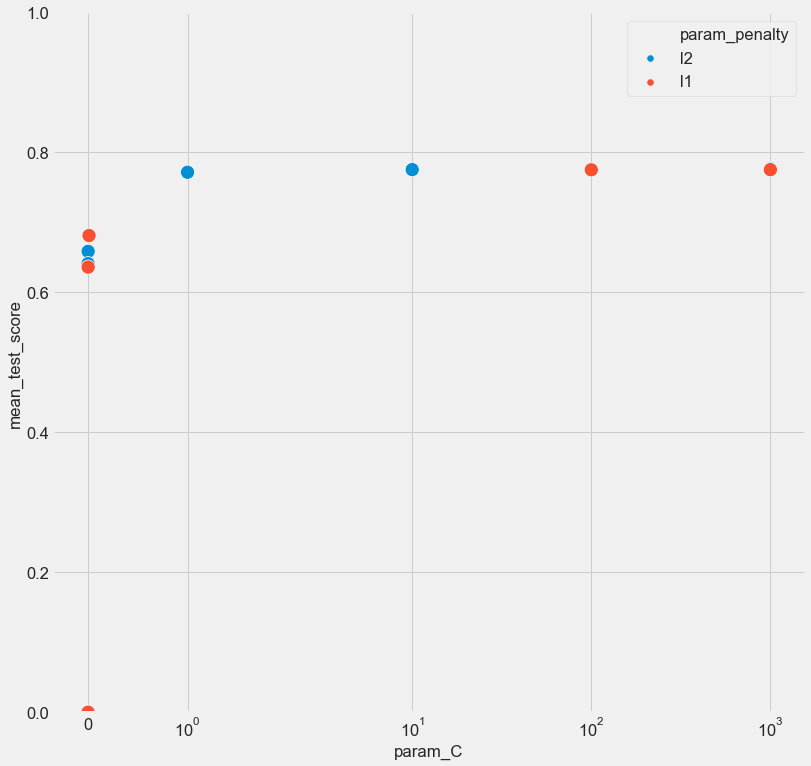

In [132]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,12))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.0,1))
plt.show()

In [ ]:
##In the beginning of this study, I checked general characteristic of the data set. Data has some NULL values. Even though, dropping missing values is still an option due to low percentage of missing values in data, I preferred to filled them by the mean of data. Data set shows that red wine is very reach in wine quality with a high correlation with alcohol. I also looked at quality levels in each variable by using suitable charts for a general understanding. Following sections, I searched for 2 different types of models with different bins. Behind this study I created many models for a better accuracy and recall scores. This study only shows the best model with good scores and predictions. The first model was included 2 bins with all variables in a quality range of 0-5,5-10. This model gives %0.74 accuracy score on train and test samples. df_bins3 data frame was split in 3 different bins to check accuracy levels. First bin was between 0-5,5-6,6-10 range. This model gives score of %0.58.
#On the other hand, when bins are arranged by following 0-4,4-7,7-10; score reached 0.93%. I continued with this model for the further steps on other performance measurements.

#A general note: These results for imbalance data, thus I would like to see scores after balancing data set. Due to this reason, and to check the difference between logistic regression model, I resampled imbalance data. In previous steps, I added bins in low and high ranges on quality variable, this section will show the results by using resampling method. However, having very high scores and a negative R square show that data set needs another approach at the end. For further studies, more suitable data set can be chosen.

#A Quick Note for Resampling Data: Splitting data in 2 parts from 0 to 5 gives a balance distribution. However, when we split data from 0 to 4 in the first bin, I got an imbalance data. After resampling our data, I needed to switch y values in array format to have Cross Validation scores.

#Generally, our measurements and model scores worked well to show the aim of the study. This study can be completed in a shorter way as well without repeating similar functions; however, this study also aims to use different methods to have accurate scores from variable sources.

#I focused on classification methods on this study. However, I agree that other algorithms can be more successful such as Random forest and Boosting algorithms give better results. I will use these methods in my next kernel.